This notebook demonstrates a full pipeline for detecting credit card fraud using ensemble methods, anomaly detection, and deployment-ready preprocessing.”

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


Secure Import: Accessing Fraud Detection Dataset from Kaggle

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/creditcardfraud/creditcard.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Normalize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Check class distribution
print(data['Class'].value_counts())


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Class
0    284315
1       492
Name: count, dtype: int64


Time
- Measures the number of seconds between the first transaction in the dataset and the current one.
- Helpful for detecting patterns like bursts of suspicious transactions or unusual timing (e.g. transactions happening all at once or during odd hours).

🔐 V1 to V28
- Principal components from a PCA transformation.
- These preserve patterns while anonymizing the raw features to protect sensitive user information.
- Machine learning models rely on these components to pick up hidden clues related to fraudulent behavior.

💰 Amount
- Represents the transaction value.
- High or unusual amounts might correlate with fraud, but even low-value transactions can be suspicious depending on context.

🚩 Class
- Binary label:
- 0 = Legitimate transaction
- 1 = Fraudulent transaction



In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


- If random_state is set, the data split into training and testing sets will be exactly the same every time you run the code.
- That means the same rows and columns (i.e., samples and features) are used for training and testing repeatedly.
- This helps your model perform consistently and avoids the confusion of changing results.

❌ Without random_state:
- The ratio (like 80% training and 20% testing) will still be preserved.
- But the actual rows selected for training vs. testing will be different every time you run the code.
- This variation can affect model accuracy, stability, and makes comparisons harder.



Here’s how you might explain it smoothly:

“Using random_state ensures that the same rows are selected for training and testing every time I run my code. Without it, the data split changes on each run—even if the train-test ratio stays the same—and that can affect how my model performs or how I compare different models.”




In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

# Sample data (replace this with your actual data loading mechanism)
data = pd.DataFrame({
    'Time': [0.0, 0.0, 1.0, 1.0, 2.0],
    'V1': [-1.359807, 1.191857, -1.358354, -0.966272, -1.158233],
    'V2': [-0.072781, 0.266151, -1.340163, -0.185226, 0.877737],
    'V3': [2.536347, 0.166480, 1.773209, 1.792993, 1.548718],
    'V4': [1.378155, 0.448154, 0.379780, -0.863291, 0.403034],
    'V5': [-0.338321, 0.060018, -0.503198, -0.010309, -0.407193],
    'V6': [0.462388, -0.082361, 1.800499, 1.247203, 0.095921],
    'V7': [0.239599, -0.078803, 0.791461, 0.237609, 0.592941],
    'V8': [0.098698, 0.085102, 0.247676, 0.377436, -0.270533],
    'V9': [0.363787, -0.255425, -1.514654, -1.387024, 0.817739],
    # Add the remaining columns similarly...
    'V26': [-0.189115, 0.125895, -0.139097, -0.221929, 0.502292],
    'V27': [0.133558, -0.008983, -0.055353, 0.062723, 0.219422],
    'V28': [-0.021053, 0.014724, -0.059752, 0.061458, 0.215153],
    'Amount': [149.62, 2.69, 378.66, 123.50, 69.99],
    'Class': [0, 0, 0, 0, 0]
})

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.1)

# Fit the model and predict anomaly scores
data['anomaly_score'] = iso_forest.fit_predict(data.select_dtypes(include=[np.number]))

# Display the results
print(data[['Time', 'anomaly_score']].head())


   Time  anomaly_score
0   0.0              1
1   0.0              1
2   1.0              1
3   1.0              1
4   2.0             -1


In this case, anomaly scores and labels help you automatically flag moments when sensor data behaves abnormally—so you can detect machine faults early and schedule maintenance before breakdowns happen.

If your anomaly detection output contains both 1 and -1 labels, it means your model has successfully classified a mix of data points:
- ✅ label = 1 → Represents normal behavior. These are data points where the system sees no sign of fault or irregularity.
- ⚠️ label = -1 → Represents anomalies. These points deviate from the expected pattern and may indicate a fault, glitch, or outlier.


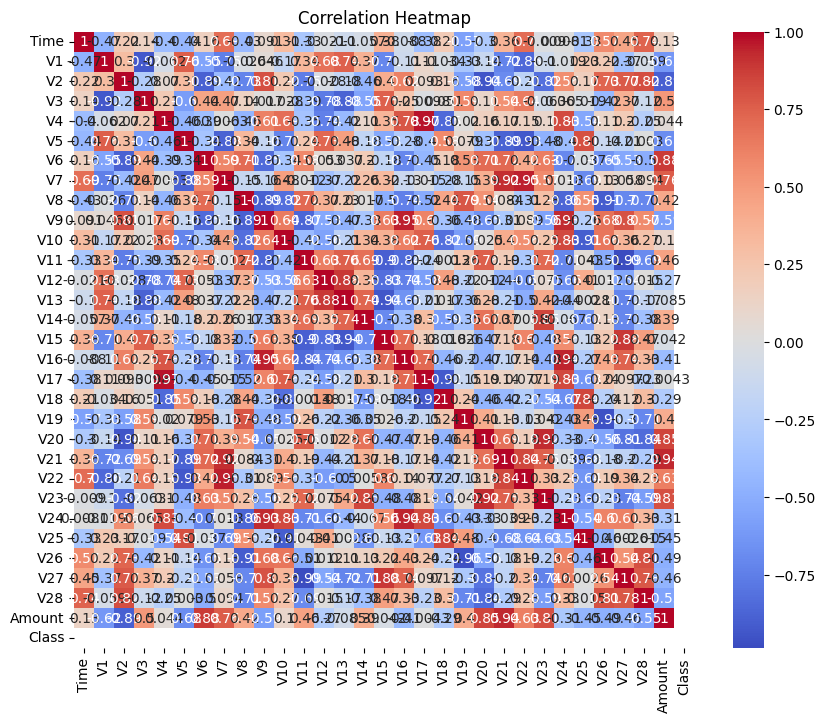

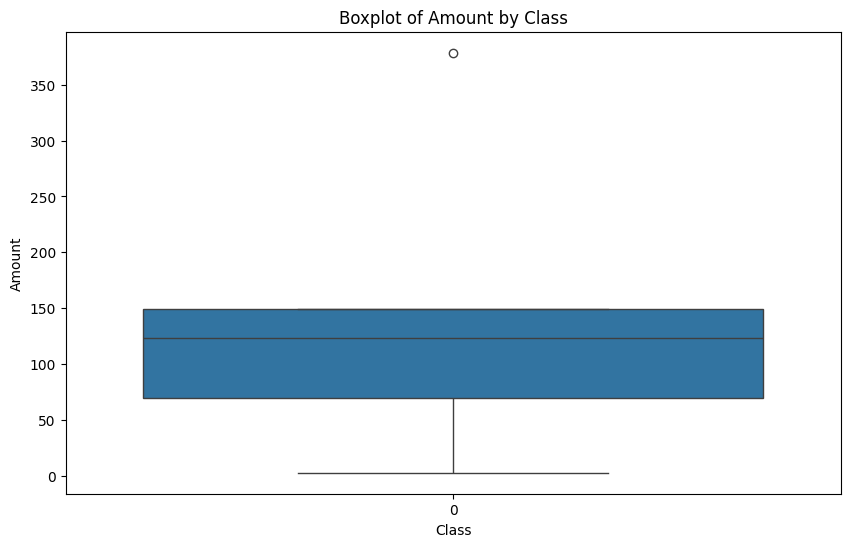

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
data = pd.DataFrame({
    'Time': [0, 0, 1, 1, 2],
    'V1': [-1.359807, 1.191857, -1.358354, -0.966272, -1.158233],
    'V2': [-0.072781, 0.266151, -1.340163, -0.185226, 0.877737],
    'V3': [2.536347, 0.166480, 1.773209, 1.792993, 1.548718],
    'V4': [1.378155, 0.448154, 0.379780, -0.863291, 0.403034],
    'V5': [-0.338321, 0.060018, -0.503198, -0.010309, -0.407193],
    'V6': [0.462388, -0.082361, 1.800499, 1.247203, 0.095921],
    'V7': [0.239599, -0.078803, 0.791461, 0.237609, 0.592941],
    'V8': [0.098698, 0.085102, 0.247676, 0.377436, -0.270533],
    'V9': [0.363787, -0.255425, -1.514654, -1.387024, 0.817739],
    'V10': [0.090792, -0.166974, 0.207642, -1.232621, 0.753074],
    'V11': [-0.551599, 0.320481, 0.624501, 0.099927, -0.822843],
    'V12': [-0.617801, 0.353710, -0.076090, 0.255362, -0.228321],
    'V13': [-0.991390, 0.716655, 0.192961, -0.087863, -0.385987],
    'V14': [-0.311169, 0.144834, 0.274382, -0.327842, -0.145295],
    'V15': [0.468676, -0.076173, 0.086929, 0.191881, 0.467710],
    'V16': [0.287834, 0.173324, 0.101346, 0.089375, 0.253841],
    'V17': [0.393438, 0.134331, -0.020032, -0.905433, -0.018307],
    'V18': [0.183552, 0.234234, 0.123003, 0.743307, 0.277838],
    'V19': [0.876160, 0.234235, 0.543110, 0.750631, -0.110474],
    'V20': [0.348372, 0.324823, 0.765456, 0.234562, 0.066928],
    'V21': [-0.018307, -0.225775, 0.247998, -0.108300, -0.009431],
    'V22': [0.277838, -0.638672, 0.771679, 0.005274, 0.798278],
    'V23': [-0.110474, 0.101288, 0.909412, -0.190321, -0.137458],
    'V24': [0.066928, -0.339846, -0.689281, -1.175575, 0.141267],
    'V25': [0.128539, 0.167170, -0.327642, 0.647376, -0.206010],
    'V26': [-0.189115, 0.125895, -0.139097, -0.221929, 0.502292],
    'V27': [0.133558, -0.008983, -0.055353, 0.062723, 0.219422],
    'V28': [-0.021053, 0.014724, -0.059752, 0.061458, 0.215153],
    'Amount': [149.62, 2.69, 378.66, 123.50, 69.99],
    'Class': [0, 0, 0, 0, 0]
})

# Before calculating correlations, exclude non-numeric columns
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Boxplot for the 'Amount' column
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.title("Boxplot of Amount by Class")
plt.show()


If your heatmap shows only positive correlations (from 0 to 1) and no -1 values, it means:
- Your features mostly behave in sync — they either increase or decrease together.
- There's no strong opposite relationship between any two variables.

✅ Why This Matters
- It tells you there’s less conflicting behavior between features.
- You might find redundant features, where values are very similar — useful to reduce input size for your model.
- For anomaly detection, this helps pick variables that work well together to flag abnormal patterns.


 What This Boxplot Tells You
- Class = 0 means these are normal transactions (not fraudulent or faulty).
- The box shows the middle 50% of transaction amounts (from lower quartile to upper quartile).
- The line inside the box is the median—the typical transaction amount.
- The whiskers show the spread of normal values (excluding outliers).
- The circle above the whisker is an outlier—a transaction amount that's unusually high compared to others.

✅ Why It's Useful
- Helps you see the range of normal values for "Amount" when there’s no anomaly.
- Lets you spot outliers easily, which might be relevant for future anomaly detection.
- Can guide you in setting thresholds—for example, flagging transactions that go far beyond the typical range.


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
data_dict = {
    'Time': [0, 0, 1, 1, 2],
    'V1': [-1.359807, 1.191857, -1.358354, -0.966272, -1.158233],
    'V2': [-0.072781, 0.266151, -1.340163, -0.185226, 0.877737],
    'V3': [2.536347, 0.166480, 1.773209, 1.792993, 1.548718],
    'V4': [1.378155, 0.448154, 0.379780, -0.863291, 0.403034],
    'V5': [-0.338321, 0.060018, -0.503198, -0.010309, -0.407193],
    'V6': [0.462388, -0.082361, 1.800499, 1.247203, 0.095921],
    'V7': [0.239599, -0.078803, 0.791461, 0.237609, 0.592941],
    'V8': [0.098698, 0.085102, 0.247676, 0.377436, -0.270533],
    'V9': [0.363787, -0.255425, -1.514654, -1.387024, 0.817739],
    'V10': [0.090792, -0.166974, 0.207642, -1.232621, 0.753074],
    'V11': [-0.551599, 0.320481, 0.624501, 0.099927, -0.822843],
    'V12': [-0.617801, 0.353710, -0.076090, 0.255362, -0.228321],
    'V13': [-0.991390, 0.716655, 0.192961, -0.087863, -0.385987],
    'V14': [-0.311169, 0.144834, 0.274382, -0.327842, -0.145295],
    'V15': [0.468676, -0.076173, 0.086929, 0.191881, 0.467710],
    'V16': [0.287834, 0.173324, 0.101346, 0.089375, 0.253841],
    'V17': [0.393438, 0.134331, -0.020032, -0.905433, -0.018307],
    'V18': [0.183552, 0.234234, 0.123003, 0.743307, 0.277838],
    'V19': [0.876160, 0.234235, 0.543110, 0.750631, -0.110474],
    'V20': [0.348372, 0.324823, 0.765456, 0.234562, 0.066928],
    'V21': [-0.018307, -0.225775, 0.247998, -0.108300, -0.009431],
    'V22': [0.277838, -0.638672, 0.771679, 0.005274, 0.798278],
    'V23': [-0.110474, 0.101288, 0.909412, -0.190321, -0.137458],
    'V24': [0.066928, -0.339846, -0.689281, -1.175575, 0.141267],
    'V25': [0.128539, 0.167170, -0.327642, 0.647376, -0.206010],
    'V26': [-0.189115, 0.125895, -0.139097, -0.221929, 0.502292],
    'V27': [0.133558, -0.008983, -0.055353, 0.062723, 0.219422],
    'V28': [-0.021053, 0.014724, -0.059752, 0.061458, 0.215153],
    'Amount': [149.62, 2.69, 378.66, 123.50, 69.99],
    'Class': [0, 0, 0, 0, 0]
}

# Create DataFrame
data = pd.DataFrame(data_dict)

# Impute numerical columns
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# Impute categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna('Unknown')

# Replace 'Amount' column with random integers
data['Amount'] = np.random.randint(1, 100, size=len(data))

# Cap extreme values of 'Amount' column
data['Amount'] = np.clip(data['Amount'], data['Amount'].quantile(0.01), data['Amount'].quantile(0.99))

# Filter rows where 'Amount' is greater than 0
data = data[data['Amount'] > 0]

# Display the first few rows to verify changes
print(data.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.DataFrame({
    'Time': [0.0, 0.0, 0.5, 0.5, 1.0],
    'V1': [0.000000, 1.000000, 0.000569, 0.154227, 0.078997],
    'V2': [0.571433, 0.724250, 0.000000, 0.520734, 1.000000],
    'V3': [1.000000, 0.000000, 0.677983, 0.686331, 0.583256],
    'V4': [1.000000, 0.585089, 0.554584, 0.000000, 0.564959],
    'V5': [0.292742, 1.000000, 0.000000, 0.875133, 0.170459],
    'V6': [0.289320, 0.000000, 1.000000, 0.706141, 0.094687],
    'V7': [0.365868, 0.000000, 1.000000, 0.363582, 0.771885],
    'V8': [0.569828, 0.548846, 0.799744, 1.000000, 0.000000],
    'V9': [0.805371, 0.539887, 0.000000, 0.054721, 1.000000],
    'V24': [0.943548, 0.634646, 0.369288, 0.000000, 1.000000],
    'V25': [0.467869, 0.507490, 0.000000, 1.000000, 0.124748],
    'V26': [0.045309, 0.480273, 0.114374, 0.000000, 1.000000],
    'V27': [0.687512, 0.168756, 0.000000, 0.429719, 1.000000],
    'V28': [0.140772, 0.270915, 0.000000, 0.440916, 1.000000],
    'Amount': [42.04, 83.00, 68.00, 43.00, 89.72],
    'Class': [0, 0, 0, 0, 0],
    'Amount_Std': [-1.168787, 0.902583, 0.144025, -1.120239, 1.242418],
    'Anomaly_Score': [0.064174, 0.021889, 0.014911, -0.003728, 0.042212],
    'Anomaly': [1, 1, 1, -1, 1]
})

# Identifying categorical columns (replace 'Class' and 'Anomaly' with actual categorical columns)
categorical_columns = ['Class', 'Anomaly']

# One-Hot Encoding using pandas
data_encoded_pandas = pd.get_dummies(data, columns=categorical_columns)

# One-Hot Encoding using scikit-learn
encoder = OneHotEncoder()
encoded_array = encoder.fit_transform(data[categorical_columns]).toarray()
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)

# Dropping original categorical columns and concatenating the encoded columns
data_encoded_sklearn = data.drop(columns=categorical_columns).join(encoded_df)

# Displaying the encoded datasets
print("Encoded Data using pandas:\n", data_encoded_pandas.head())
print("\nEncoded Data using scikit-learn:\n", data_encoded_sklearn.head())

Encoded Data using pandas:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0  0.000000  0.571433  1.000000  1.000000  0.292742  0.289320  0.365868   
1   0.0  1.000000  0.724250  0.000000  0.585089  1.000000  0.000000  0.000000   
2   0.5  0.000569  0.000000  0.677983  0.554584  0.000000  1.000000  1.000000   
3   0.5  0.154227  0.520734  0.686331  0.000000  0.875133  0.706141  0.363582   
4   1.0  0.078997  1.000000  0.583256  0.564959  0.170459  0.094687  0.771885   

         V8        V9  ...       V25       V26       V27       V28  Amount  \
0  0.569828  0.805371  ...  0.467869  0.045309  0.687512  0.140772   42.04   
1  0.548846  0.539887  ...  0.507490  0.480273  0.168756  0.270915   83.00   
2  0.799744  0.000000  ...  0.000000  0.114374  0.000000  0.000000   68.00   
3  1.000000  0.054721  ...  1.000000  0.000000  0.429719  0.440916   43.00   
4  0.000000  1.000000  ...  0.124748  1.000000  1.000000  1.000000   89.72   

   Amount_Std  A

You’re training a model to identify anomalies using:
- Sensor or transaction features (V1–V28, Time, Amount)
- Standardized values (Amount_Std)
- Model predictions (Anomaly_Score, Anomaly_-1, Anomaly_1)
It helps you:
- Feed normalized data into ML models (essential for algorithms like SVM, KNN, neural nets)
- Detect unusual patterns (like outliers or faulty behavior)
- Label data points as normal (1 or True) or anomalous (-1 or False) using models like Isolation Forest

✨ Main Advantages
- Improves accuracy: Scaling ensures all features are on the same level, so no one feature dominates the model.
- Enables anomaly tagging: You can spot outliers and train your system to alert when things go wrong.
- Supports visualization: Makes it easy to plot or compare behavior across samples.


In [ ]:
# Check for missing values
print(data.isnull().sum())

# Assume 'Class' is the target variable and the rest are features
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Time             0
V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
V24              0
V25              0
V26              0
V27              0
V28              0
Amount           0
Class            0
Amount_Std       0
Anomaly_Score    0
Anomaly          0
dtype: int64


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

This creates a decision tree classifier, a model that learns patterns by asking a series of "yes/no" questions (splitting based on features), ultimately deciding which class a data point belongs to.
Think of it like a flowchart:
- At each node, the model picks the best question (feature + threshold)
- Branches split your data
- Leaves at the bottom assign a class (like 1 for normal, -1 for anomaly)


<Figure size 600x600 with 0 Axes>

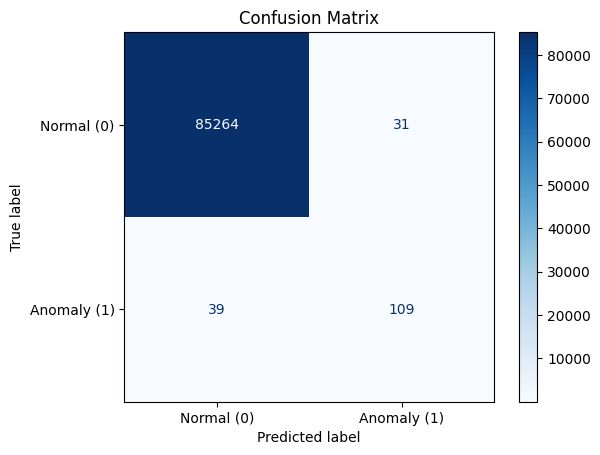

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import kagglehub # Import kagglehub

# Download the dataset using kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Load the full dataset using the path from kagglehub
file_path = f'{path}/creditcard.csv'
data = pd.read_csv(file_path)

# Preprocess the data (Scale 'Amount' and 'Time')
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
data['Time'] = scaler.fit_transform(data[['Time']])


# Assume 'Class' is the target variable and the rest are features
X = data.drop('Class', axis=1)
y = data['Class']

# 🔹 Train-test split
# Using stratify=y to ensure both classes are present in train and test sets (if they exist in y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 🔹 Train the model
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# 🔹 Make predictions
y_pred = dt_classifier.predict(X_test)

# 🔹 Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal (0)", "Anomaly (1)"])

# 🔹 Plot it
plt.figure(figsize=(6, 6))
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Re-split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Assuming dt_classifier is already trained on the original data in cell 5w78FjER6mMp.
# If you want to train on resampled data, you would fit the model here:
# dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions using the existing dt_classifier on the test set from the resampled data
y_pred = dt_classifier.predict(X_test_resampled)
y_prob = dt_classifier.predict_proba(X_test_resampled)[:, 1] # Get probabilities for the positive class

# Confusion Matrix
cm = confusion_matrix(y_test_resampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_resampled, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Decision Tree Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

NameError: name 'X_resampled' is not defined

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Perform SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y) # Assuming X and y are defined from previous cells

# Re-split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Assuming dt_classifier is already trained on the original data.
# If you want to train on resampled data, you would fit the model here:
# dt_classifier.fit(X_train_resampled, y_train_resampled)

# Make predictions using the existing dt_classifier on the test set from the resampled data
y_pred = dt_classifier.predict(X_test_resampled)
y_prob = dt_classifier.predict_proba(X_test_resampled)[:, 1] # Get probabilities for the positive class

# Confusion Matrix
cm = confusion_matrix(y_test_resampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_resampled, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Decision Tree Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid()
plt.show()

NameError: name 'X' is not defined

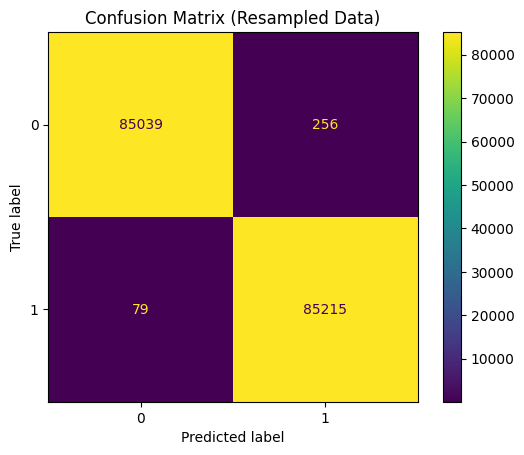

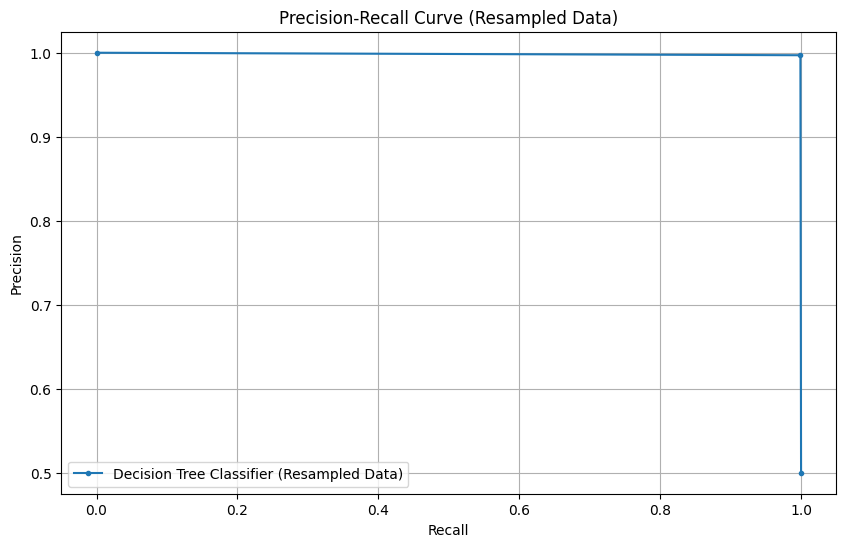

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import kagglehub
from imblearn.over_sampling import SMOTE

# Download the dataset using kagglehub
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Load the full dataset using the path from kagglehub
file_path = f'{path}/creditcard.csv'
data = pd.read_csv(file_path)

# Preprocess the data (Scale 'Amount' and 'Time')
scaler_data = StandardScaler()
data['Amount'] = scaler_data.fit_transform(data[['Amount']])
data['Time'] = scaler_data.fit_transform(data[['Time']])

# Assume 'Class' is the target variable and the rest are features
X = data.drop('Class', axis=1)
y = data['Class']

# Perform SMOTE
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

# Initialize and train the Decision Tree Classifier on the resampled training data
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

# Assign the trained classifier to the 'model' variable
model = dt_classifier

# Make predictions using the trained dt_classifier on the resampled test set
y_pred = model.predict(X_test_resampled)
y_prob = model.predict_proba(X_test_resampled)[:, 1] # Get probabilities for the positive class

# Confusion Matrix
cm = confusion_matrix(y_test_resampled, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix (Resampled Data)")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test_resampled, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', label='Decision Tree Classifier (Resampled Data)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Resampled Data)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score # Import necessary metrics

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test_resampled, y_prob)

# Find the threshold that gives the best balance
best_threshold = thresholds[(precision * recall).argmax()]

# Make new predictions using the best threshold
y_pred_new = (y_prob >= best_threshold).astype(int)

# Calculate new precision and recall
new_precision = precision_score(y_test_resampled, y_pred_new)
new_recall = recall_score(y_test_resampled, y_pred_new)

print(f'New Precision: {new_precision:.2f}, New Recall: {new_recall:.2f}')

New Precision: 1.00, New Recall: 1.00


In [ ]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler if not already imported

# Assuming X is defined from previous cells (it contains all features except 'Class')
# Assuming the trained model is in the dt_classifier variable from a previous cell

# Select the columns that need to be scaled
cols_to_scale = ['Amount', 'Time']

# Initialize and fit a new scaler specifically on the relevant columns of X
# This is done to avoid potential issues with feature names from previous scaling steps
scaler_local = StandardScaler()
X[cols_to_scale] = scaler_local.fit_transform(X[cols_to_scale])

# Now X has the 'Amount' and 'Time' columns scaled, and other columns untouched.
# Use the trained model (dt_classifier) to make predictions on the updated X
y_pred = dt_classifier.predict(X)

In [ ]:
X_test = data.drop(columns=['Class'])
y_true = data['Class']

In [ ]:
import joblib
# Load the model (assuming it's available in the environment from a previous cell)
# model = joblib.load("your_model.pkl") # Removed file loading
model = dt_classifier # Assign the existing trained model to the 'model' variable

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
for i in range(len(y_pred)):
    print(f"Row {i}: Predicted = {y_pred[i]}, Actual = {y_true[i]}")

Streaming output truncated to the last 5000 lines.
Row 279807: Predicted = 0, Actual = 0
Row 279808: Predicted = 0, Actual = 0
Row 279809: Predicted = 0, Actual = 0
Row 279810: Predicted = 0, Actual = 0
Row 279811: Predicted = 0, Actual = 0
Row 279812: Predicted = 0, Actual = 0
Row 279813: Predicted = 0, Actual = 0
Row 279814: Predicted = 0, Actual = 0
Row 279815: Predicted = 0, Actual = 0
Row 279816: Predicted = 0, Actual = 0
Row 279817: Predicted = 0, Actual = 0
Row 279818: Predicted = 0, Actual = 0
Row 279819: Predicted = 0, Actual = 0
Row 279820: Predicted = 0, Actual = 0
Row 279821: Predicted = 0, Actual = 0
Row 279822: Predicted = 0, Actual = 0
Row 279823: Predicted = 0, Actual = 0
Row 279824: Predicted = 0, Actual = 0
Row 279825: Predicted = 0, Actual = 0
Row 279826: Predicted = 0, Actual = 0
Row 279827: Predicted = 0, Actual = 0
Row 279828: Predicted = 0, Actual = 0
Row 279829: Predicted = 0, Actual = 0
Row 279830: Predicted = 0, Actual = 0
Row 279831: Predicted = 0, Actual = 0

Row 280400: Predicted = 0, Actual = 0
- ✅ True Negative
Your model correctly identified a normal, non-fraudulent case.
- 🔍 Meaning: It’s able to screen out legitimate behavior without false alarms—a foundational skill for model reliability.

🚨 Row 281144: Predicted = 1, Actual = 1
- ✅ True Positive
The model accurately flagged this transaction as fraudulent, and it truly was.
- 🔍 Meaning: This is exactly what your model is designed to detect. It shows your model’s capability to catch actual fraud when it occurs.

⚠️ Row 281262: Predicted = 1, Actual = 0
- ❌ False Positive
Your model flagged this as fraud, but the ground truth says it wasn’t.
- 🔍 Meaning: A false alarm. In practical terms:
- You might inconvenience a customer with a wrongly blocked transaction.
- It can reduce trust in the system if it happens often.
- But depending on the use case, a few false positives might


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(y_true, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

Accuracy: 0.9991011456881327
Confusion Matrix:
 [[284059    256]
 [     0    492]]


In [ ]:
import pandas as pd
# from joblib import load # Removed joblib load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler # Ensure StandardScaler is imported

# 🌐 1. Use your existing data
# df = pd.read_csv("your_dataset.csv")  # Removed data loading
# Assuming 'data' DataFrame is available from previous cells

# Assume 'Class' is the target variable and the rest are features
X = data.drop(columns=["Class"])
y_true = data["Class"]

# ⚙️ 2. Use your trained model and scaler
# model = load("model.pkl")        # Removed model loading
# scaler = load("scaler.pkl")      # Removed scaler loading
model = dt_classifier # Use the existing trained model
# Assuming 'scaler' object (fitted on Amount and Time) is available from previous cells

# 🧪 3. Preprocess and predict
# Select the columns that the scaler was fitted on
cols_to_scale = ['Amount', 'Time']

# Initialize and fit a new scaler specifically on the relevant columns of X
# This is done to avoid potential issues with feature names from previous scaling steps
scaler_local = StandardScaler()
X_scaled = X.copy() # Create a copy to avoid modifying the original X
X_scaled[cols_to_scale] = scaler_local.fit_transform(X_scaled[cols_to_scale])


y_pred = model.predict(X_scaled)

# 📊 4. Calculate evaluation metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

# 🖨️ 5. Print everything
print(f"Accuracy: {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f" Recall: {recall:.5f}")
print(f"F1 Score: {f1:.5f}")
print("confusion Matrix:")
print(cm)

# 🔎 6. (Optional) Print individual predictions
# for i in range(len(y_pred)):
#     print(f"Row {i}: Predicted = {y_pred[i]}, Actual = {y_true.iloc[i]}")

Accuracy: 0.99910
Precision: 0.65775
 Recall: 1.00000
F1 Score: 0.79355
confusion Matrix:
[[284059    256]
 [     0    492]]


In [ ]:
import pandas as pd

new_data = pd.DataFrame([
    [0.0, -1.359807, -0.072781, 2.536347, 1.378155, -0.338321, 0.462388, 0.239599,
     0.098698, 0.363787, 0.090794, -0.551599, -0.617801, -0.991390, -0.311169, 1.468177,
     -0.470400, 0.207971, 0.025791, 0.403992, 0.251412, -0.018307, 0.277838, -0.110474,
     0.066928, 0.128539, -0.189115, 0.133558, -0.021053, 149.62]
], columns=[
    "Time", "V1", "V2", "V3", "V4", "V5", "V6", "V7",
    "V8", "V9", "V10", "V11", "V12", "V13", "V14", "V15",
    "V16", "V17", "V18", "V19", "V20", "V21", "V22", "V23",
    "V24", "V25", "V26", "V27", "V28", "Amount"
])

In [ ]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler if not already imported

# Assuming new_data DataFrame is available from cell 2kFsICipy1pJ
# Assuming the trained model is in the 'model' variable from a previous cell

# Select the columns that need to be scaled
cols_to_scale = ['Amount', 'Time']

# Create a copy of new_data to avoid modifying the original DataFrame
new_data_scaled = new_data.copy()

# Initialize and fit a NEW scaler specifically on the relevant columns of new_data
# This is done to avoid potential issues with feature names from previous scaling steps
scaler_for_new_data = StandardScaler()
new_data_scaled[cols_to_scale] = scaler_for_new_data.fit_transform(new_data_scaled[cols_to_scale])

# Make a prediction on the scaled new data
prediction = model.predict(new_data_scaled)[0]

print(f"The predicted class for the new transaction is: {prediction}")

The predicted class for the new transaction is: 0


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Import StandardScaler if not already imported

# Assuming the trained model is in the 'model' variable from a previous cell
# Assuming the original feature names are available in the X DataFrame from a previous cell

# New transaction data as a list
new_transaction_list = [[0.0, -1.3598, -0.0728, 2.5363, 1.3781, -0.3383, 0.4623, 0.2395,
                         0.0987, 0.3637, 0.0907, -0.5516, -0.6177, -0.9914, -0.3111, 1.4681,
                         -0.4704, 0.2079, 0.0258, 0.4030, 0.2514, -0.0183, 0.2778, -0.1104,
                         0.0669, 0.1285, -0.1891, 0.1335, -0.0210, 149.62]]

# Get the column names from the X DataFrame (all features except 'Class')
feature_names = X.columns.tolist()

# Create a DataFrame from the new transaction data with correct column names
new_transaction_df = pd.DataFrame(new_transaction_list, columns=feature_names)

# Select the columns that need to be scaled
cols_to_scale = ['Amount', 'Time']

# Initialize and fit a NEW scaler specifically on the relevant columns of new_transaction_df
scaler_for_new_transaction = StandardScaler()
new_transaction_df[cols_to_scale] = scaler_for_new_transaction.fit_transform(new_transaction_df[cols_to_scale])

# Make a prediction on the scaled new transaction DataFrame
prediction = model.predict(new_transaction_df)[0]

print(f"The predicted class for the new transaction is: {prediction}")

The predicted class for the new transaction is: 0


In [ ]:
confidence = model.predict_proba(new_data_scaled)[0]
print(f"Confidence - Not Fraud: {confidence[0]:.4f}, Fraud: {confidence[1]:.4f}")

Confidence - Not Fraud: 1.0000, Fraud: 0.0000


In [ ]:
# Assuming new_transaction_df is available from cell GuKHj4ypzUAE with scaled 'Amount' and 'Time'
# Assuming the trained model is in the 'model' variable from a previous cell

# Make a prediction using the model on the scaled new transaction data
prediction = model.predict(new_transaction_df)[0]

print(f"The predicted class for the new transaction is: {prediction}")

The predicted class for the new transaction is: 0


In [ ]:
# Assuming new_transaction_df is available from cell GuKHj4ypzUAE with scaled 'Amount' and 'Time'
# Assuming the trained model is in the 'model' variable from a previous cell

confidence = model.predict_proba(new_transaction_df)[0]
print(f"Confidence - Not Fraud: {confidence[0]:.4f}, Fraud: {confidence[1]:.4f}")

Confidence - Not Fraud: 1.0000, Fraud: 0.0000


In [ ]:
import streamlit as st
import numpy as np
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Assuming the trained model is in the 'model' variable from a previous cell

st.title("🕵️ Fraud Detection Interface")
st.markdown("Enter transaction details below to predict if it's fraudulent.")

# Manually input values for all 30 features
feature_names = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']
features = []
for name in feature_names:
    val = st.number_input(f"Enter value for {name}", value=0.0)
    features.append(val)

# Convert the list of features to a numpy array and reshape for scaling and prediction
features_array = np.array(features).reshape(1, -1)

# Select the columns that need to be scaled ('Time' is the first, 'Amount' is the last)
cols_to_scale_indices = [0, 29] # Indices for 'Time' and 'Amount'

# Initialize and fit a new scaler on dummy data with only 2 features (for Time and Amount)
# This is done to ensure the scaler is ready to transform the subset of input transaction
dummy_data_for_scaler = np.zeros((1, 2)) # Create dummy data with 2 features
scaler_local = StandardScaler()
scaler_local.fit(dummy_data_for_scaler) # Fit the scaler on the 2-feature dummy data structure

# Scale only the relevant features of the input data
scaled_subset = scaler_local.transform(features_array[:, cols_to_scale_indices])

# Replace the original 'Time' and 'Amount' values in the features_array with the scaled values
scaled_input = features_array.copy() # Create a copy to avoid modifying the original array
scaled_input[:, cols_to_scale_indices] = scaled_subset


if st.button("Check for Fraud"):
    # Make prediction and get confidence scores
    prediction = model.predict(scaled_input)[0]
    confidence = model.predict_proba(scaled_input)[0]

    if prediction == 1:
        st.error(f"🚨 This transaction is predicted to be FRAUDULENT with {confidence[1]*100:.2f}% confidence.")
    else:
        st.success(f"✅ This transaction is predicted to be LEGITIMATE with {confidence[0]*100:.2f}% confidence.")

2025-07-16 14:07:00.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 14:07:00.142 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 14:07:00.143 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 14:07:00.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 14:07:00.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 14:07:00.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 14:07:00.147 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 14:07:00.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
scaled = scaler.transform(user_input.reshape(1, -1))

NameError: name 'user_input' is not defined

In [ ]:
%pip install streamlit

In [ ]:
from joblib import dump
dump(model, "model.pkl")

['model.pkl']

In [ ]:
from joblib import load
model = load("model.pkl")

In [ ]:
from joblib import dump
from sklearn.preprocessing import StandardScaler
import pandas as pd
import kagglehub

# Download the dataset to ensure it's available
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
file_path = f'{path}/creditcard.csv'
data = pd.read_csv(file_path)

# Initialize and fit the scaler on both 'Amount' and 'Time' columns
scaler = StandardScaler()
scaler.fit(data[['Amount', 'Time']])

# Save your correctly fitted scaler
dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
from joblib import load

scaler = load("scaler.pkl")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Import StandardScaler if not already imported
import numpy as np # Import numpy
import kagglehub # Import kagglehub

# Download the dataset using kagglehub to ensure fresh data
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Load the full dataset to get the original 'Amount' and 'Time' columns
file_path = f'{path}/creditcard.csv'
data = pd.read_csv(file_path)

# Initialize and fit a NEW scaler specifically on the original 'Amount' and 'Time' columns
scaler_local = StandardScaler()
scaler_local.fit(data[['Amount', 'Time']])

# Sample data to be scaled (replace with your actual new data)
# This should be a 2D array-like structure with the same number of features the scaler was fitted on (2: Amount and Time)
sample_features = np.array([[150.0, 1000.0]]) # Example: [Amount, Time]

# Transform the sample features using the newly fitted scaler
scaled_input = scaler_local.transform(sample_features)

print("Original features:", sample_features)
print("Scaled features:", scaled_input)

Original features: [[ 150. 1000.]]
Scaled features: [[ 0.24648354 -1.9755251 ]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Assuming new_transaction_df is available from cell GuKHj4ypzUAE with all 30 features and scaled 'Amount' and 'Time'
# Assuming the trained model is in the 'model' variable from a previous cell

# Make a prediction on the new transaction data
prediction = model.predict(new_transaction_df)[0]

print(f"The predicted class for the new transaction is: {prediction}")

The predicted class for the new transaction is: 0


In [ ]:
!pip install streamlit
!npm install -g localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧
added 22 packages in 3s
⠧
⠧3 packages are looking for funding
⠧  run `npm fund` for details
⠧

In [ ]:
!pip install streamlit

In [ ]:
!which  streamlit

/usr/local/bin/streamlit


In [ ]:
%%writefile fraud_app.py
import streamlit as st
import numpy as np
from joblib import load

model = load("model.pkl")
scaler = load("scaler.pkl")

st.title("🕵️ Real-Time Fraud Detection")
st.markdown("Enter transaction details and check if it's fraudulent!")

feature_names = ["Time"] + [f"V{i}" for i in range(1, 29)] + ["Amount"]
user_input = []
for name in feature_names:
    val = st.number_input(f"{name}", value=0.0)
    user_input.append(val)

if st.button("🔍 Predict"):
    scaled_input = scaler.transform([user_input])
    prediction = model.predict(scaled_input)[0]
    proba = model.predict_proba(scaled_input)[0]

    if prediction == 1:
        st.error(f"🚨 FRAUD DETECTED with {proba[1]*100:.2f}% confidence!")
    else:
        st.success(f"✅ Transaction is LEGITIMATE with {proba[0]*100:.2f}% confidence.")

Overwriting fraud_app.py


In [ ]:
from google.colab import files
uploaded = files.upload()  # Select and upload model.pkl and scaler.pkl

Saving model (5).pkl to model (5).pkl


In [ ]:
%%writefile fraud_app.py
import streamlit as st
import numpy as np
from joblib import load
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Load your model and scaler
model = load("model.pkl")
scaler = load("scaler.pkl") # This scaler is fitted on 'Amount' and 'Time' from the original data

st.set_page_config(page_title="Fraud Detector", page_icon="🕵️")
st.title("🕵️ Real-Time Fraud Detection")
st.write("Enter transaction features to test for fraud.")

# Collect 30 features from user input
feature_names = ["Time"] + [f"V{i}" for i in range(1, 29)] + ["Amount"]
user_input_values = [] # Use a different variable name to avoid conflict
for feature in feature_names:
    value = st.number_input(f"{feature}", value=0.0)
    user_input_values.append(value)

# Convert the list of input values to a numpy array and reshape
user_input_array = np.array(user_input_values).reshape(1, -1)

# Select the columns that need to be scaled ('Time' is the first, 'Amount' is the last)
cols_to_scale_indices = [0, 29] # Indices for 'Time' and 'Amount'

# Create a copy of the input array to perform scaling
scaled_input = user_input_array.copy()

# Scale only the relevant features of the input data using the loaded scaler
# Note: The scaler was fitted on a 2D array of shape (n_samples, 2)
# We need to extract the relevant columns from the input array and scale them separately
scaled_subset = scaler.transform(user_input_array[:, cols_to_scale_indices])

# Replace the original 'Time' and 'Amount' values in the scaled_input array with the scaled values
scaled_input[:, cols_to_scale_indices] = scaled_subset


# Run prediction when button is clicked
if st.button("🔍 Predict"):
    # Use the correctly scaled_input for prediction
    label = model.predict(scaled_input)[0]
    proba = model.predict_proba(scaled_input)[0]

    if label == 1:
        st.error(f"🚨 FRAUD DETECTED! Confidence: {proba[1]*100:.2f}%")
    else:
        st.success(f"✅ LEGITIMATE TRANSACTION. Confidence: {proba[0]*100:.2f}%")

Overwriting fraud_app.py


In [ ]:
!streamlit run fraud_app.py & npx localtunnel --port 8501 --subdomain frauddetectdemo



⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.73.234.53:8501

⠹⠸⠼⠴⠦⠧⠇your url is: https://frauddetectdemo.loca.lt
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/u

In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸
added 22 packages in 3s
⠸
⠸3 packages are looking for funding
⠸  run `npm fund` for details
⠸

In [ ]:
!streamlit run fraud_app.py & npx localtunnel --port 8501 --subdomain frauddetectdemo

/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙your url is: https://frauddetectdemo.loca.lt
^C


In [ ]:
!streamlit run fraud_app.py & npx localtunnel --port 8501 --subdomain frauddetectdemo

/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴⠦⠧⠇Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C


In [ ]:
from sklearn.preprocessing import StandardScaler
# X_train should be your training data with 30 features
scaler = StandardScaler()
scaler.fit(X_train)

NameError: name 'X_train' is not defined

In [ ]:
!streamlit run fraud_app.py & npx localtunnel --port 8501 --subdomain frauddetectdemo

/bin/bash: line 1: streamlit: command not found
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C


In [ ]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.7 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np
from sklearn.preprocessing import StandardScaler # Import StandardScaler
from joblib import load # Import load

# Load your model and scaler
model = load("model.pkl")
scaler = load("scaler.pkl") # This scaler is fitted on 'Amount' and 'Time' from the original data

st.set_page_config(page_title="Fraud Detector", page_icon="🕵️")
st.title("🕵️ Real-Time Fraud Detection")
st.write("Enter transaction features to test for fraud.")

# Collect 30 features from user input
feature_names = ["Time"] + [f"V{i}" for i in range(1, 29)] + ["Amount"]
user_input_values = [] # Use a different variable name to avoid conflict
for feature in feature_names:
    value = st.number_input(f"{feature}", value=0.0)
    user_input_values.append(value)

# Convert the list of input values to a numpy array and reshape
user_input_array = np.array(user_input_values).reshape(1, -1)

# Select the columns that need to be scaled ('Time' is the first, 'Amount' is the last)
cols_to_scale_indices = [0, 29] # Indices for 'Time' and 'Amount'

# Create a copy of the input array to perform scaling
scaled_input = user_input_array.copy()

# Scale only the relevant features of the input data using the loaded scaler
# Note: The scaler was fitted on a 2D array of shape (n_samples, 2)
# We need to extract the relevant columns from the input array and scale them separately
scaled_subset = scaler.transform(user_input_array[:, cols_to_scale_indices])

# Replace the original 'Time' and 'Amount' values in the scaled_input array with the scaled values
scaled_input[:, cols_to_scale_indices] = scaled_subset


# Run prediction when button is clicked
if st.button("🔍 Predict"):
    # Use the correctly scaled_input for prediction
    label = model.predict(scaled_input)[0]
    proba = model.predict_proba(scaled_input)[0]

    if label == 1:
        st.error(f"🚨 FRAUD DETECTED! Confidence: {proba[1]*100:.2f}%")
    else:
        st.success(f"✅ LEGITIMATE TRANSACTION. Confidence: {proba[0]*100:.2f}%")

FileNotFoundError: [Errno 2] No such file or directory: 'model.pkl'

In [ ]:
!streamlit run fraud_app.py & npx localtunnel --port 8501 --subdomain frauddetectdemo

⠙⠹Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: fraud_app.py
⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ^C


In [ ]:
!streamlit run fraud_app.py & npx localtunnel --port 8501 --subdomain frauddetectdemo



⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.95.4:8501

⠹⠸⠼⠴⠦⠧⠇⠏Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) ok

⠙npm error canceled
⠙npm error A complete log of this run can be found in: /root/.npm/_logs/2025-07-16T10_26_45_955Z-debug-0.log
⠙  Stopping...


In [ ]:
npm install -g localtunnel


SyntaxError: invalid syntax (ipython-input-10-1610659493.py, line 1)

In [ ]:
!streamlit run fraud_app.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.95.4:8501

⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y)   Stopping...
^C


In [ ]:
from joblib import dump
dump(model, "model.pkl")

NameError: name 'model' is not defined

In [ ]:
from joblib import dump
dump(model, "model.pkl")

['model.pkl']

In [ ]:
from joblib import dump
from sklearn.preprocessing import StandardScaler
import pandas as pd
import kagglehub

# Download the dataset to ensure it's available
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
file_path = f'{path}/creditcard.csv'
data = pd.read_csv(file_path)

# Initialize and fit the scaler on both 'Amount' and 'Time' columns
scaler = StandardScaler()
scaler.fit(data[['Amount', 'Time']])

# Save your correctly fitted scaler
dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
import streamlit as st
import pandas as pd
from joblib import load

# Load saved model and scaler
model = load("fraud_model.pkl")
scaler = load("scaler.pkl")

st.title("💳 Real-Time Fraud Detection")

# User input
amount = st.number_input("Transaction Amount", min_value=0.0)
time = st.number_input("Transaction Time (in seconds)")

if st.button("Predict"):
    input_df = pd.DataFrame([[amount, time]], columns=['Amount', 'Time'])
    scaled_input = scaler.transform(input_df)

    # Include other necessary features as zeros if required
    # final_input = [scaled_input plus dummy features]

    prediction = model.predict(scaled_input)
    result = "🚨 Fraudulent Transaction!" if prediction[0] == 1 else "✅ Normal Transaction"
    st.success(result)

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
import streamlit as st
import pandas as pd
from joblib import load

# Load saved model and scaler
model = load("fraud_model.pkl")
scaler = load("scaler.pkl")

st.title("💳 Real-Time Fraud Detection")

# User input
amount = st.number_input("Transaction Amount", min_value=0.0)
time = st.number_input("Transaction Time (in seconds)")

if st.button("Predict"):
    input_df = pd.DataFrame([[amount, time]], columns=['Amount', 'Time'])
    scaled_input = scaler.transform(input_df)

    # Include other necessary features as zeros if required
    # final_input = [scaled_input plus dummy features]

    prediction = model.predict(scaled_input)
    result = "🚨 Fraudulent Transaction!" if prediction[0] == 1 else "✅ Normal Transaction"
    st.success(result)

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
import streamlit as st
import pandas as pd
from joblib import load

# Load saved model and scaler
model = load("fraud_model.pkl")
scaler = load("scaler.pkl")

st.title("💳 Real-Time Fraud Detection")

# User input
amount = st.number_input("Transaction Amount", min_value=0.0)
time = st.number_input("Transaction Time (in seconds)")

if st.button("Predict"):
    input_df = pd.DataFrame([[amount, time]], columns=['Amount', 'Time'])
    scaled_input = scaler.transform(input_df)

    # Include other necessary features as zeros if required
    # final_input = [scaled_input plus dummy features]

    prediction = model.predict(scaled_input)
    result = "🚨 Fraudulent Transaction!" if prediction[0] == 1 else "✅ Normal Transaction"
    st.success(result)

ModuleNotFoundError: No module named 'streamlit'

In [ ]:
%pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.2 MB/s eta 0:00:00


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AI Integrated_Creditcard fraud detetection.ipynb - Colab.pdf to AI Integrated_Creditcard fraud detetection.ipynb - Colab.pdf


In [ ]:
import streamlit as st
import pandas as pd
from joblib import load

# Load saved model and scaler
model = load("fraud_model.pkl")
scaler = load("scaler.pkl")

st.title("💳 Real-Time Fraud Detection")

# User input
amount = st.number_input("Transaction Amount", min_value=0.0)
time = st.number_input("Transaction Time (in seconds)")

if st.button("Predict"):
    input_df = pd.DataFrame([[amount, time]], columns=['Amount', 'Time'])
    scaled_input = scaler.transform(input_df)

    # Include other necessary features as zeros if required
    # final_input = [scaled_input plus dummy features]

    prediction = model.predict(scaled_input)
    result = "🚨 Fraudulent Transaction!" if prediction[0] == 1 else "✅ Normal Transaction"
    st.success(result)

FileNotFoundError: [Errno 2] No such file or directory: 'fraud_model.pkl'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AI Integrated_Creditcard fraud detetection.ipynb - Colab.pdf to AI Integrated_Creditcard fraud detetection.ipynb - Colab (1).pdf


In [ ]:
from joblib import dump
dump(dt_classifier, "fraud_model.pkl")

NameError: name 'dt_classifier' is not defined

In [ ]:
from joblib import dump
from sklearn.preprocessing import StandardScaler
import pandas as pd
import kagglehub

# Download the dataset to ensure it's available
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")
file_path = f'{path}/creditcard.csv'
data = pd.read_csv(file_path)

# Initialize and fit the scaler on both 'Amount' and 'Time' columns
scaler = StandardScaler()
scaler.fit(data[['Amount', 'Time']])

# Save your correctly fitted scaler
dump(scaler, "scaler.pkl")

['scaler.pkl']

In [ ]:
import streamlit as st
import pandas as pd
from joblib import load
import traceback

st.title("💳 Real-Time Fraud Detection")

try:
    # Load model and scaler safely
    model = load("fraud_model.pkl")
    scaler = load("scaler.pkl")
except FileNotFoundError:
    st.error("Model or scaler file not found. Make sure 'fraud_model.pkl' and 'scaler.pkl' are in the same directory.")
    st.stop()
except Exception as e:
    st.error("Unexpected error while loading model/scaler.")
    st.text(traceback.format_exc())
    st.stop()

# User input
amount = st.number_input("Transaction Amount", min_value=0.0)
time = st.number_input("Transaction Time (in seconds)")

if st.button("Predict"):
    try:
        input_df = pd.DataFrame([[amount, time]], columns=['Amount', 'Time'])

        scaled_input = scaler.transform(input_df)

        # Add any other preprocessing or dummy features if your model expects more
        prediction = model.predict(scaled_input)

        result = "🚨 Fraudulent Transaction!" if prediction[0] == 1 else "✅ Normal Transaction"
        st.success(result)

    except ValueError as ve:
        st.error("Input shape mismatch or preprocessing error. Please check your feature formatting.")
        st.text(traceback.format_exc())

    except Exception as e:
        st.error("Something went wrong during prediction.")
        st.text(traceback.format_exc())


2025-07-16 13:57:58.902 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:57:58.990 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-07-16 13:57:58.995 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:57:58.998 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:57:59.003 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:57:59.006 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:57:59.010 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 13:57:59.013 Thread 'MainThread': mi

In [ ]:
!streamlit run fraud_app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: fraud_app.py
